In [1]:
import numpy as np
import networkx as nx
from itertools import chain
import argparse
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

def state_to_numpy(state):
    strlist = state.split()
    val_list = [float(s) for s in strlist]
    return np.array(val_list) 

def get_positions(G, p_file_addr, pp_no):
    array = []

    path_nodes_all = []        
    with open(p_file_addr, 'r') as file:
        lines = file.readlines()
        for line in lines:
            node_nos = line.strip('\n')
            path_nodes_all.append(node_nos.split(","))

    path_nodes = None
            
    if(not pp_no==None):        
        path_nodes = path_nodes_all[pp_no]
    else:
        path_nodes = list(chain.from_iterable(path_nodes_all)) 
    for node in path_nodes:
        if(not (node=='-1' or node=='')):
            state = G.node[node]['state']
            array.append(state_to_numpy(state))

    return array


pp_no =  3403
shape =  (4000, 100)


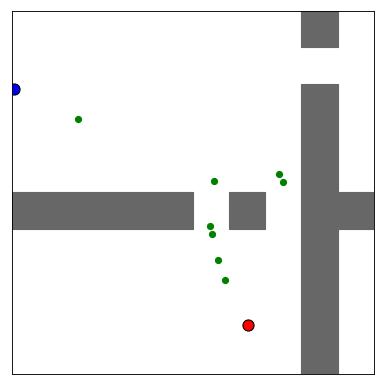

In [6]:
def main():
    G = nx.read_graphml("graphs/dense_graph.graphml")
    p_file_addr = "dataset/path_nodes.txt"
    occ_grid_file_addr = "dataset/occ_grid.txt"
    src_nodes = (np.loadtxt("dataset/start_nodes.txt", dtype = int))
    goal_nodes = (np.loadtxt("dataset/goal_nodes.txt", dtype = int))
    pp_no = random.randint(0, len(src_nodes)-1)
    node_posns = np.array(get_positions(G, p_file_addr, pp_no))
    print("pp_no = ", pp_no)
    src = state_to_numpy(G.node[str(src_nodes[pp_no])]['state'])
    goal = state_to_numpy(G.node[str(goal_nodes[pp_no])]['state'])

    occ_grid_temp = np.loadtxt(occ_grid_file_addr, delimiter = " ", dtype = int)
    occ_grid = []
    print("shape = ", occ_grid_temp.shape)
    for i in range(occ_grid_temp.shape[0]):
        occ_grid.append(occ_grid_temp[i].reshape(10,10))

    fig1 = plt.figure(figsize=(10,6), dpi=80)
    ax1 = fig1.add_subplot(111, aspect='equal')
    for i in range(10):
        for j in range(10):
            if(occ_grid[pp_no][i,j]==0):
                ax1.add_patch(patches.Rectangle(
                (i/10.0,j/10.0),   # (x,y)
                0.1,          # width
                0.1,          # height
                alpha=1,
                color = "#676767"
                ))
      
    plt.scatter(node_posns[:,0], node_posns[:,1], color = "green", s = 30)
    plt.scatter(src[0], src[1], color = "red",  s = 100, edgecolors="black")
    plt.scatter(goal[0], goal[1], color = "blue",  s = 100, edgecolors="black")
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xticks([])
    plt.yticks([])
    plt.show()


if __name__ == '__main__':
    main()